In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.decomposition import PCA
from abc import abstractmethod, ABC

df_mosquito = pd.read_csv('../datasets/mosquito-indicator.csv' , sep=',', usecols=lambda column: column != 'date')

Output the head of file for verification

In [2]:
df_mosquito.head(10)

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
5,248.5,9.5,16.3,13.0,18.6
6,243.2,0.0,16.5,10.7,22.6
7,249.0,0.0,19.4,11.6,26.8
8,249.6,0.0,20.2,16.3,25.4
9,240.8,13.5,14.5,12.5,18.1


Display dataset information

In [3]:
print('-' * 30)
print('Mosquito Dataset Information :')
print('-' * 30)
print('Total Rows:', df_mosquito.shape[0])
print('Total Columns:', df_mosquito.shape[1])
print('-' * 30)
df_mosquito.info(memory_usage=False, show_counts=False)

------------------------------
Mosquito Dataset Information :
------------------------------
Total Rows: 1342
Total Columns: 5
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mosquito_Indicator  float64
 1   rain(mm)            float64
 2   mean_T(℃)           float64
 3   min_T(℃)            float64
 4   max_T(℃)            float64
dtypes: float64(5)

Finding the number of distinct values ​​in each column

In [4]:
print('-' * 30)
print('Number of distinct values :')
print('-' * 30)
for col in df_mosquito:
    print(f"{col:20}\t{df_mosquito[col].value_counts().count()}")

------------------------------
Number of distinct values :
------------------------------
mosquito_Indicator  	657
rain(mm)            	136
mean_T(℃)           	384
min_T(℃)            	396
max_T(℃)            	395


Finding the range of numbers in each column

In [5]:
print('-' * 30)
print('Range of numbers in each column :')
print('-' * 30)
print("".ljust(20), "Minimum".ljust(10), "Maximum".ljust(10))
for i in df_mosquito.columns:
    print(i.ljust(20), str(df_mosquito[i].min()).ljust(10), str(df_mosquito[i].max()).ljust(10))

------------------------------
Range of numbers in each column :
------------------------------
                     Minimum    Maximum   
mosquito_Indicator   0.0        1000.0    
rain(mm)             0.0        144.5     
mean_T(℃)            -14.8      33.7      
min_T(℃)             -17.8      30.3      
max_T(℃)             -10.7      39.6      


Standard Deviation output

In [6]:
std_deviation_values = df_mosquito.std()

print('-' * 30)
print('Standard Deviation for each column:')
print('-' * 30)
print(std_deviation_values)

------------------------------
Standard Deviation for each column:
------------------------------
mosquito_Indicator    295.871336
rain(mm)               13.868106
mean_T(℃)              10.943990
min_T(℃)               11.109489
max_T(℃)               11.063394
dtype: float64


Variance output

In [7]:
variance_values = df_mosquito.var()

print('-' * 30)
print('Variance for each column:')
print('-' * 30)
print(variance_values)

------------------------------
Variance for each column:
------------------------------
mosquito_Indicator    87539.847584
rain(mm)                192.324368
mean_T(℃)               119.770925
min_T(℃)                123.420743
max_T(℃)                122.398693
dtype: float64


Output a matrix of missing values

------------------------------
Matrix of missing values :
------------------------------


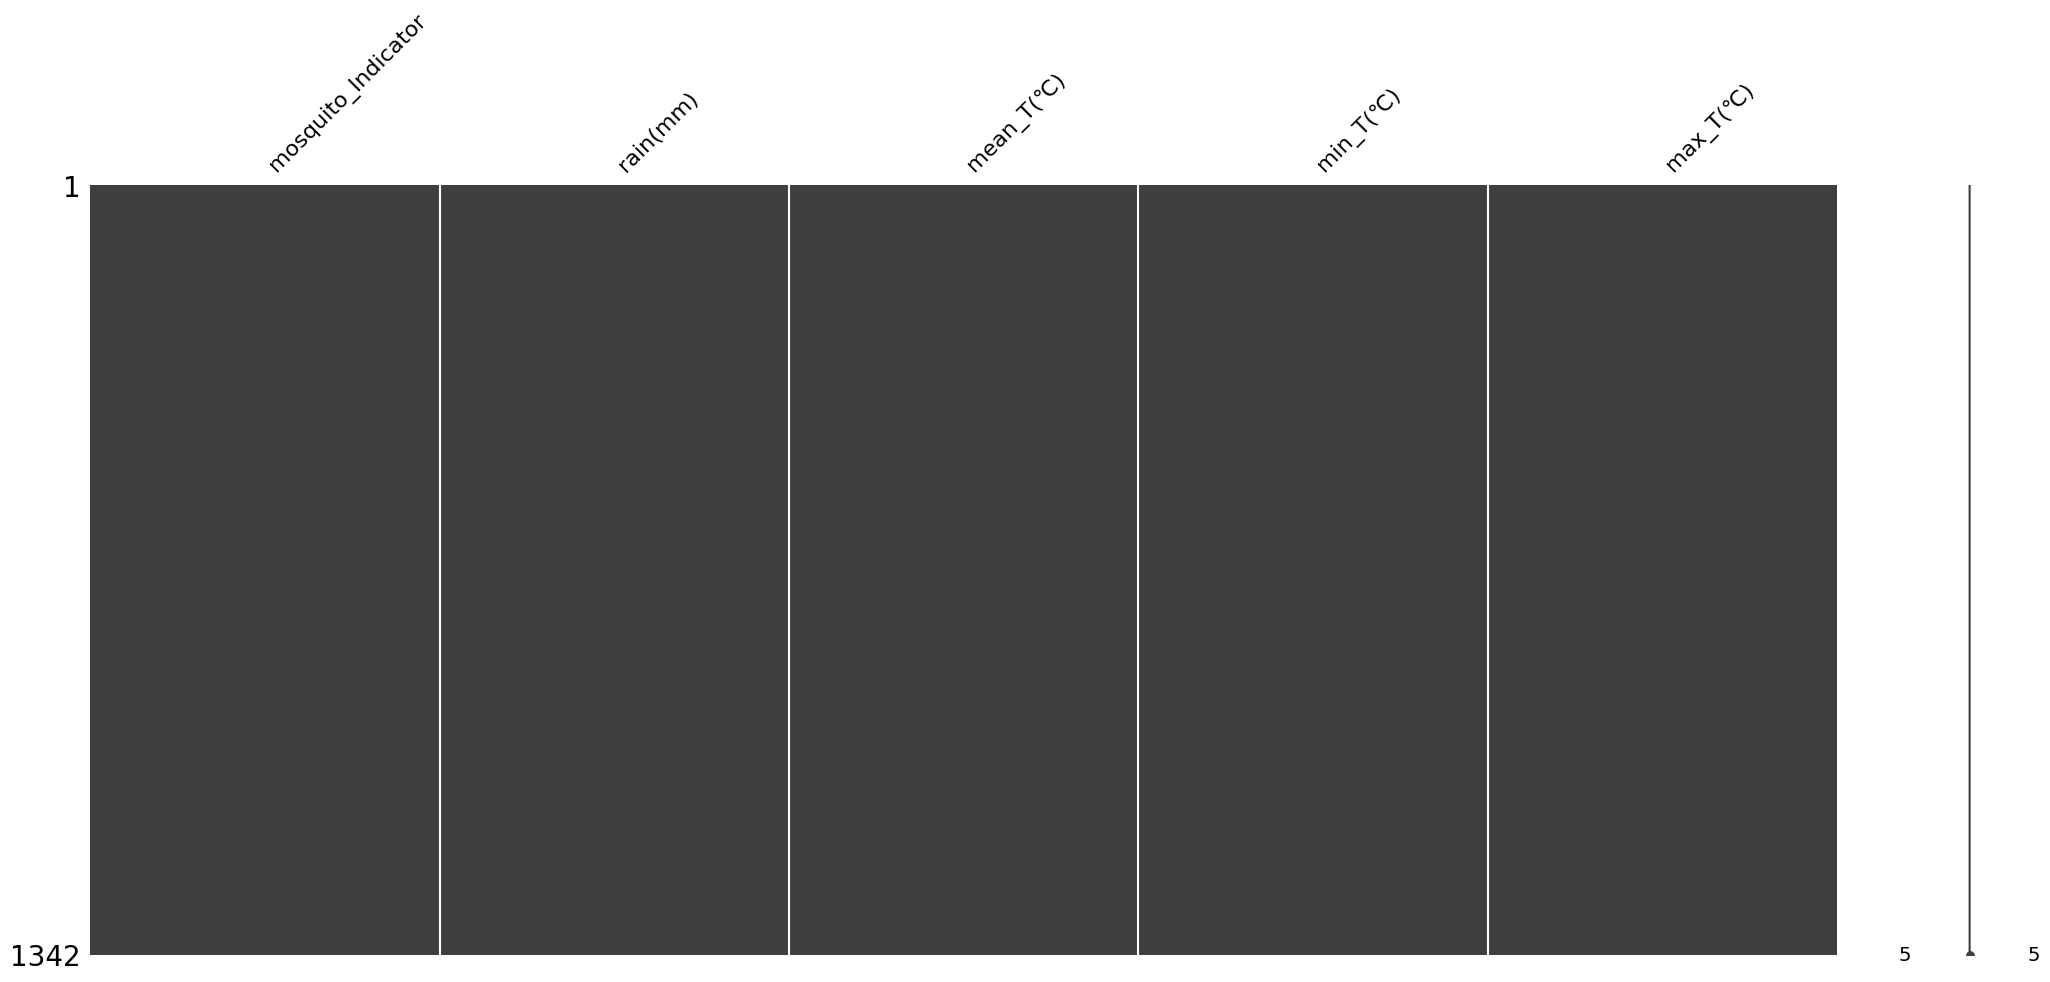

In [8]:
print('-' * 30)
print('Matrix of missing values :')
print('-' * 30)
mso.matrix(df_mosquito)
plt.show()

Output box plot

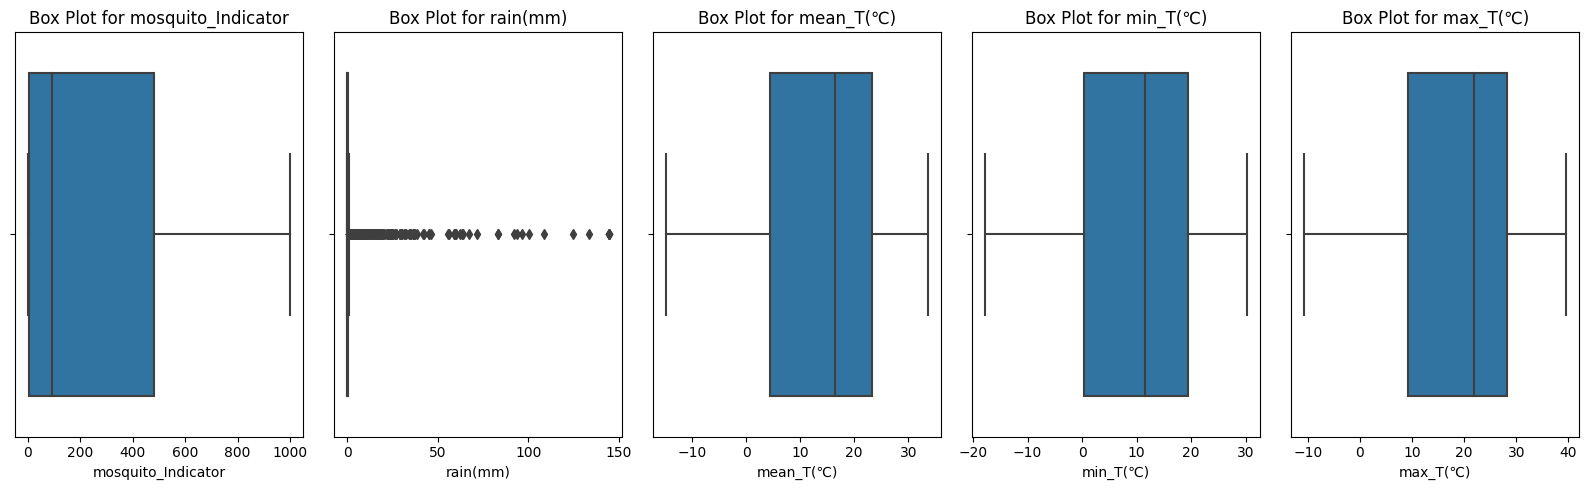

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 5))

column_names = df_mosquito.columns

for i, ax in enumerate(axes.ravel()):
    if i < len(column_names):
        sns.boxplot(data=df_mosquito, x=column_names[i], ax=ax)
        ax.set_title(f'Box Plot for {column_names[i]}')

plt.tight_layout()
plt.show()

Plotting graphs of the matrix of dependencies between the numerical features of the data

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


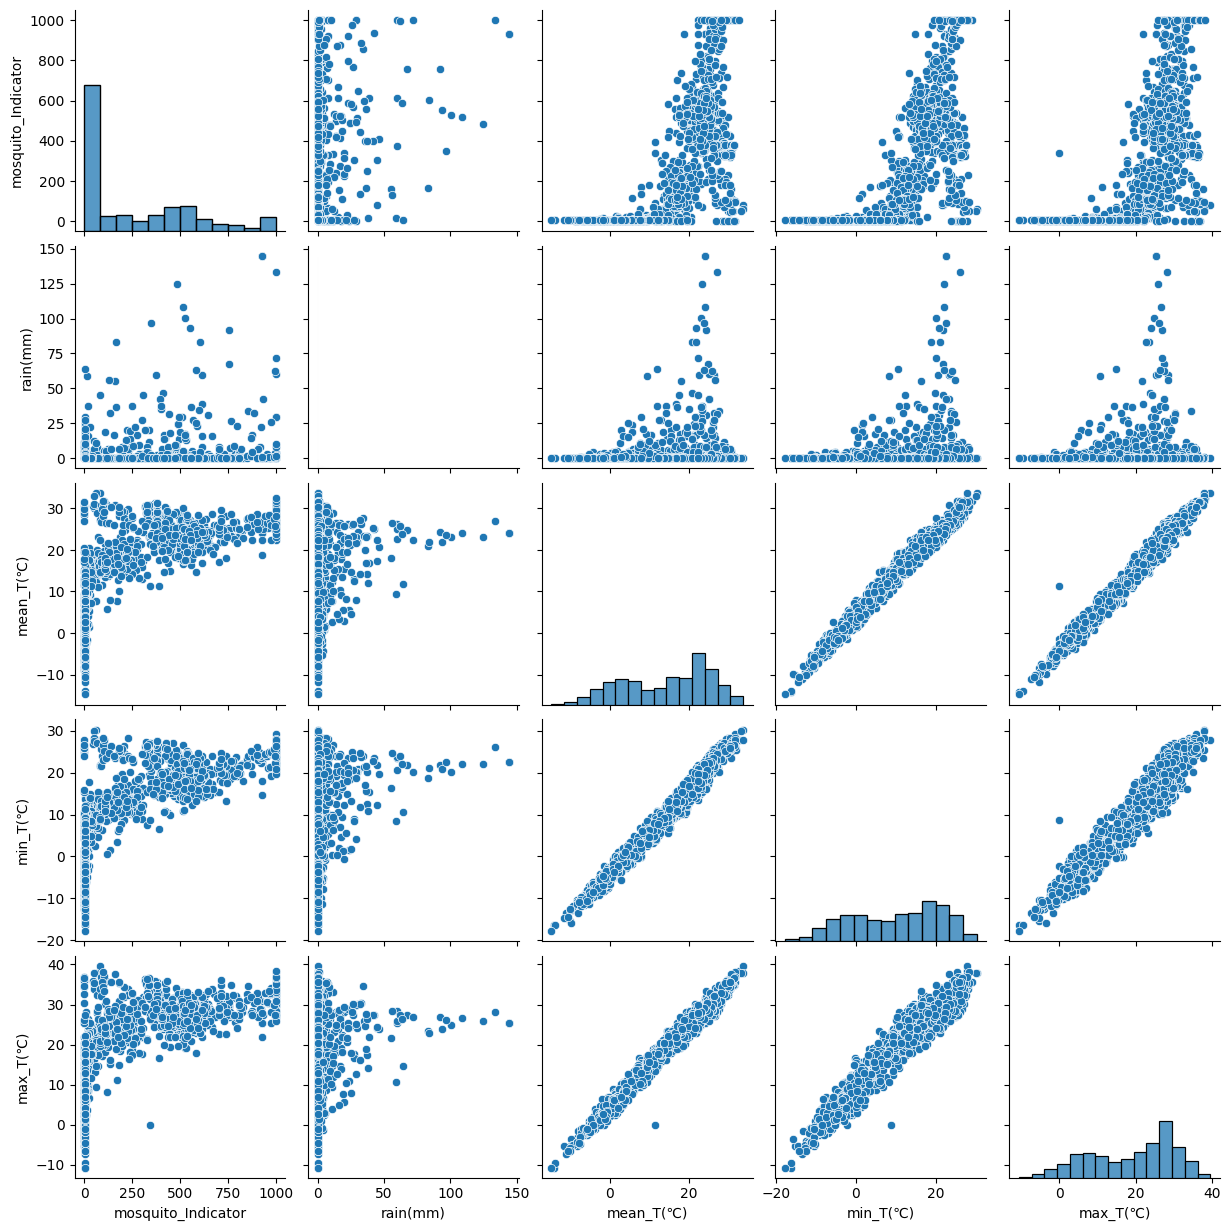

In [10]:
sns.pairplot(df_mosquito)
plt.show()

Output a correlation matrix

In [11]:
correlation_matrix = df_mosquito.corr()
correlation_matrix

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
mosquito_Indicator,1.000000,0.216325,0.730742,0.746279,0.700929
rain(mm),0.216325,1.000000,0.147173,0.189054,0.100173
mean_T(℃),0.730742,0.147173,1.000000,0.990174,0.989618
min_T(℃),0.746279,0.189054,0.990174,1.000000,0.964941
max_T(℃),0.700929,0.100173,0.989618,0.964941,1.000000


Output a heatmap

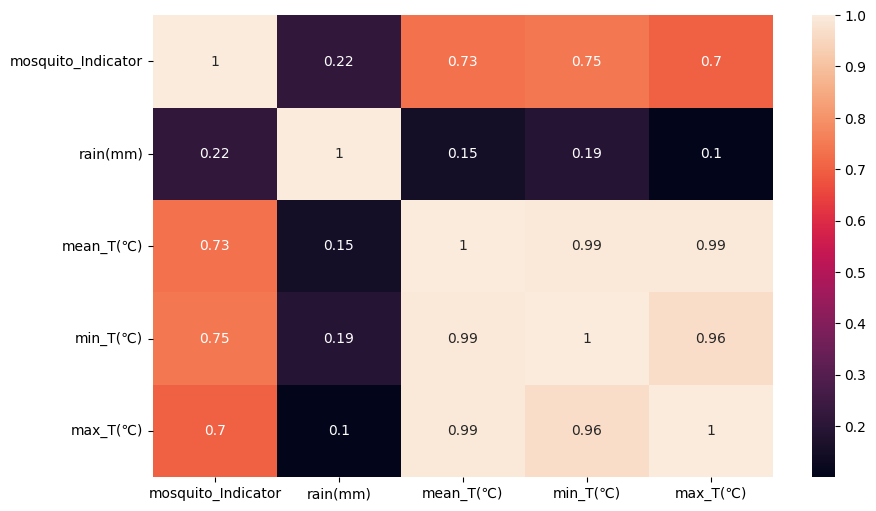

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_mosquito.corr(), annot=True);

Determining the correlation between the resulting variable "mosquito_Indicator" and other features in the data

In [13]:
print('-' * 30)
print('Correlation with target :')
print('-' * 30)
correlation_with_target = correlation_matrix['mosquito_Indicator'].abs()
correlation_with_target = correlation_with_target.drop('mosquito_Indicator')
correlation_count = (correlation_with_target > 0.15).sum()
print(correlation_with_target)
print(f"Number of columns correlated with 'mosquito_Indicator' (except 'mosquito_Indicator') : {correlation_count}")

------------------------------
Correlation with target :
------------------------------
rain(mm)     0.216325
mean_T(℃)    0.730742
min_T(℃)     0.746279
max_T(℃)     0.700929
Name: mosquito_Indicator, dtype: float64
Number of columns correlated with 'mosquito_Indicator' (except 'mosquito_Indicator') : 4


In [14]:
n_components = correlation_count

X = df_mosquito.drop('mosquito_Indicator', axis=1)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print('-' * 30)
print("PCA results :")
print('-' * 30)
print(f"{X_pca}")

------------------------------
PCA results :
------------------------------
[[-6.96589924e+00 -5.31717596e+00 -3.10869784e+00  1.12300773e-01]
 [-1.55716610e+01  9.74083836e+00 -2.61642763e+00 -7.50681820e-01]
 [-2.82122972e+00  2.33786960e+01 -9.59647554e-01  1.11709421e-02]
 ...
 [ 1.85811515e+01  2.02053221e+00  2.86173765e+00  3.77137990e-01]
 [ 2.29540336e+01  1.67417069e+00 -2.31589577e+00  2.03847712e+00]
 [ 3.82895430e+01  4.84242761e+00  1.93849047e+00  5.49204138e-02]]


Distribution Before Scaling

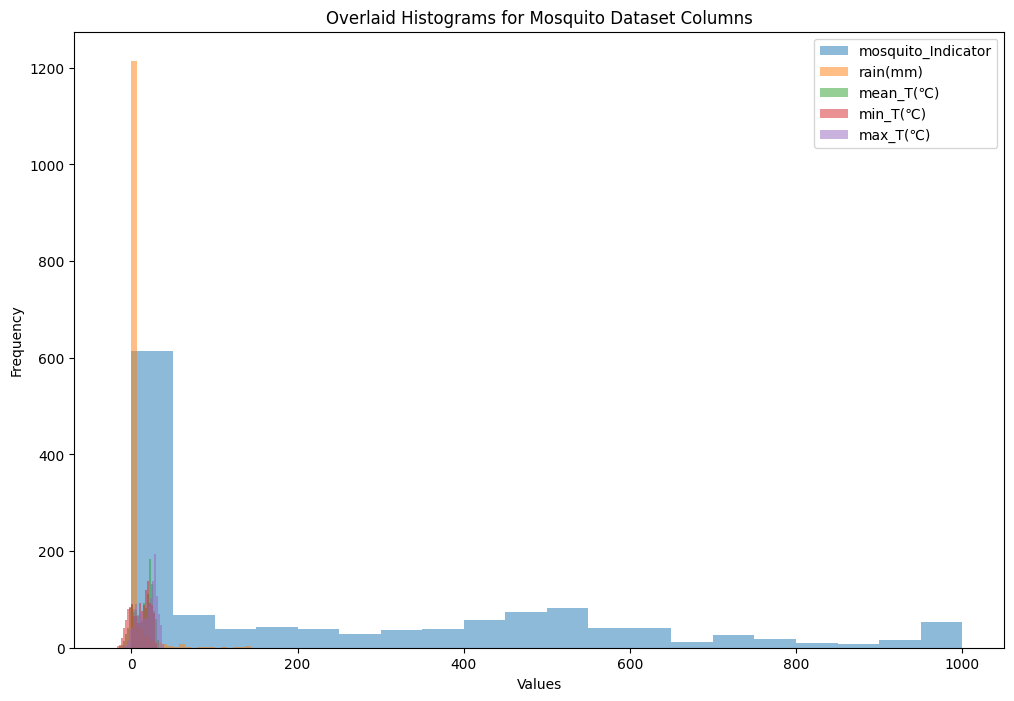

In [3]:
plt.figure(figsize=(12, 8))

for column in df_mosquito.columns:
    plt.hist(df_mosquito[column], bins=20, alpha=0.5, label=column)

plt.title('Overlaid Histograms for Mosquito Dataset Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [2]:
class DataScalar:
    def __init__(self, array=np.array([])):
        if array.size > 0:
            self.set_values(array)

    @abstractmethod
    def _scale(self, array: np.ndarray):
        """
        Scales data
        :param array: array of data
        :return: scaled array
        """
        ...

    @abstractmethod
    def set_values(self, array: np.ndarray):
        ...

    def __call__(self, array: np.ndarray):
        return self._scale(array)

Code for Standardizer

In [3]:
class Standardizer(DataScalar):
    def __init__(self, array=np.array([])):
        self._mean_values = 0
        self._std_values = 1
        super().__init__(array)

    def set_values(self, array: np.ndarray):
        self._mean_values = array.mean(axis=0)
        self._std_values = array.std(axis=0)

    def _scale(self, array: np.ndarray):
        return (array - self._mean_values) / self._std_values

Distribution After Standardization

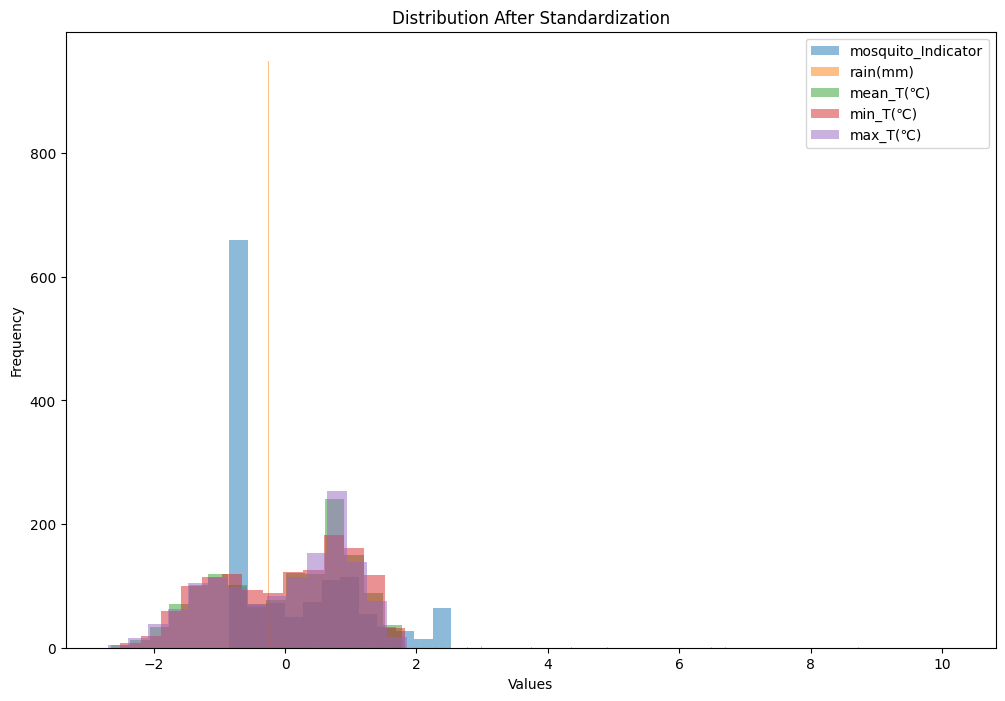

In [18]:
data = np.array(df_mosquito)
scaler = Standardizer(array=data)

scaler.set_values(data)

scaled_data = scaler._scale(data)

plt.figure(figsize=(12, 8))

for i, column in enumerate(df_mosquito.columns):
    plt.hist(scaled_data[:, i], bins='auto', alpha=0.5, label=column)

plt.title('Distribution After Standardization')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Code for Normalizer

In [4]:
class Normalizer(DataScalar):
    def __init__(self, array=np.array([])):
        self._min_values = 0
        self._max_values = 1
        super().__init__(array)

    def set_values(self, array: np.ndarray):
        self._min_values = array.min(axis=0)
        self._max_values = array.max(axis=0)

    def _scale(self, array: np.ndarray):
        return (array - self._min_values) / (self._max_values - self._min_values)

Distribution After Normalization

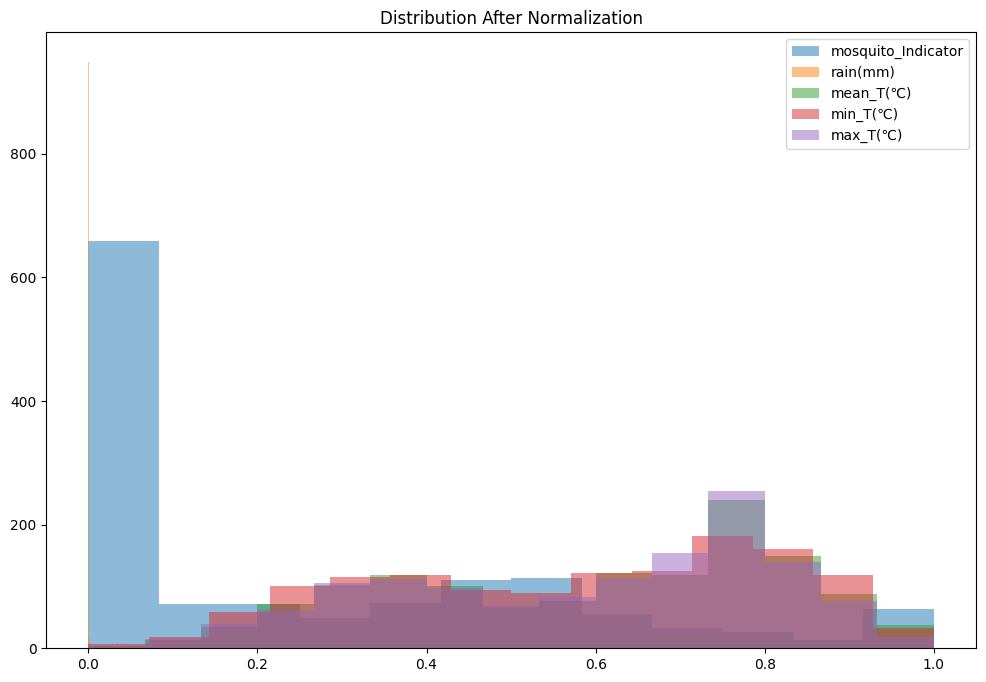

In [20]:
numerical_columns = df_mosquito.select_dtypes(include=['float64']).columns

data = np.array(df_mosquito)

scaler = Normalizer(array=data)
scaler.set_values(data)
scaled_data = scaler._scale(data)

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    plt.hist(scaled_data[:, i], bins='auto', alpha=0.5, label=column)

plt.legend()
plt.title('Distribution After Normalization')
plt.show()


Distribution After Standardization of Normalized Data

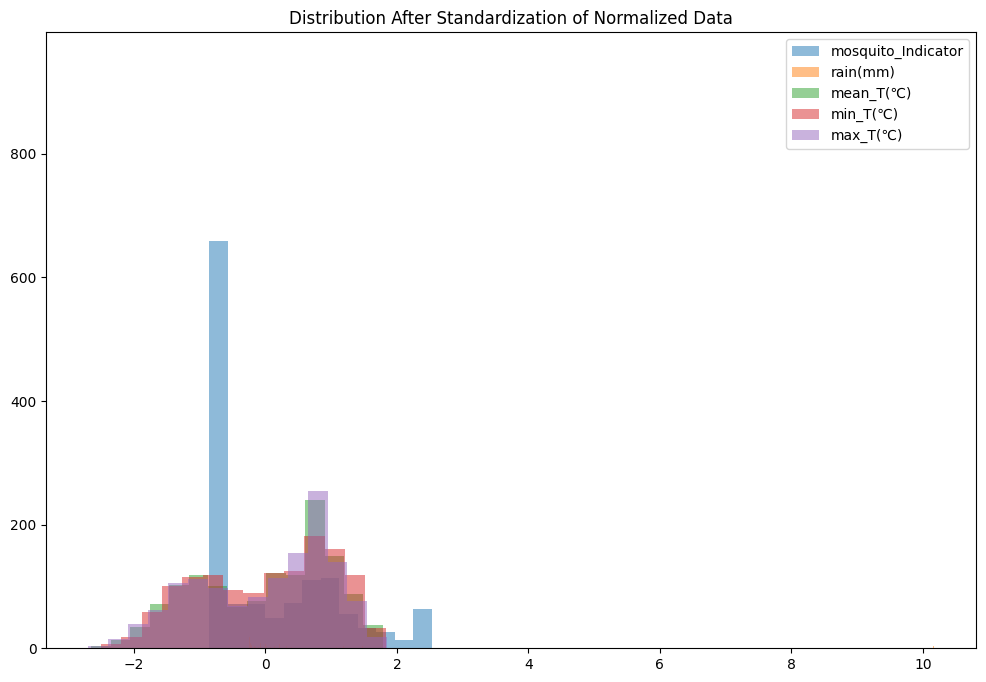

In [13]:
numerical_columns = df_mosquito.select_dtypes(include=['float64']).columns
data = np.array(df_mosquito)

normalizer = Normalizer(array=data)
normalizer.set_values(data)
normalized_data = normalizer._scale(data)

standardizer = Standardizer(array=normalized_data)
standardizer.set_values(normalized_data)
standardized_data = standardizer._scale(normalized_data)

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    plt.hist(standardized_data[:, i], bins='auto', alpha=0.5, label=column)

plt.legend()
plt.title('Distribution After Standardization of Normalized Data')
plt.show()

Distribution After Normalization of Standardized Data

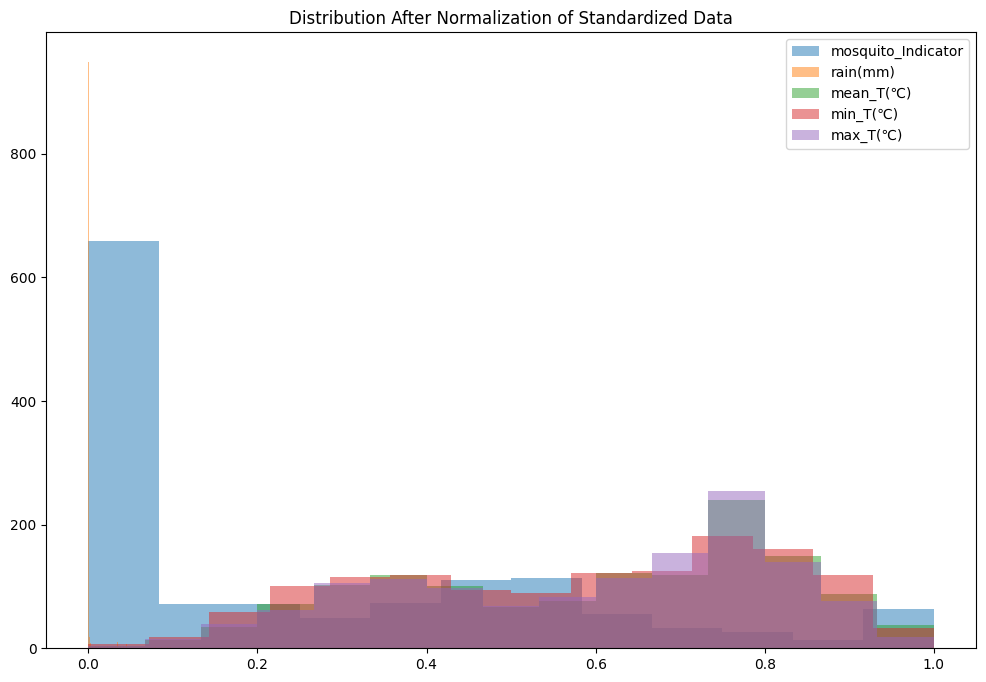

In [12]:
numerical_columns = df_mosquito.select_dtypes(include=['float64']).columns
data = np.array(df_mosquito)

standardizer = Standardizer(array=data)
standardizer.set_values(data)
standardized_data = standardizer._scale(data)

normalizer = Normalizer(array=standardized_data)
normalizer.set_values(standardized_data)
normalized_data = normalizer._scale(standardized_data)

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    plt.hist(normalized_data[:, i], bins='auto', alpha=0.5, label=column)

plt.legend()
plt.title('Distribution After Normalization of Standardized Data')
plt.show()